# Human islets - manifolds, clustering and annotation

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns
import xlsxwriter
sc.settings.verbosity = 3
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.0 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [2]:
sc.set_figure_params(frameon=False,dpi_save=300)

## Load data preprocessed and normalized data

note: adata generated in human_islets_preprocessing.ipnyb notebook

In [6]:
adata = sc.read('./data/adata_human_norm.h5ad')

/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:182: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:182: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


## Manifold all cells

In [32]:
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.highly_variable_genes(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

extracting highly variable genes
    finished (0:00:22)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:21)
computing neighbors
    using 'X_pca' with n_pcs = 50


/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets
/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:19)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:22)


## Clustering

In [34]:
sc.tl.louvain(adata)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 18 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:05)


In [83]:
sc.tl.louvain(adata, restrict_to=('louvain',['3']), key_added='louvain_refined', resolution=0.5)
sc.tl.louvain(adata, restrict_to=('louvain_refined',['8']), key_added='louvain_refined', resolution=0.3)
sc.tl.louvain(adata, restrict_to=('louvain_refined',['15']), key_added='louvain_refined', resolution=0.2)
sc.tl.louvain(adata, restrict_to=('louvain_refined',['2']), key_added='louvain_refined', resolution=0.8)
sc.tl.louvain(adata, restrict_to=('louvain_refined',['2,1']), key_added='louvain_refined', resolution=0.8)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 22 clusters and added
    'louvain_refined', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 24 clusters and added
    'louvain_refined', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 25 clusters and added
    'louvain_refined', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 31 clusters and added
    'louvain_refined', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 35 clusters and added
    'louvain_refined', the cluster labels (adata.obs, categorical) (0:00:00)


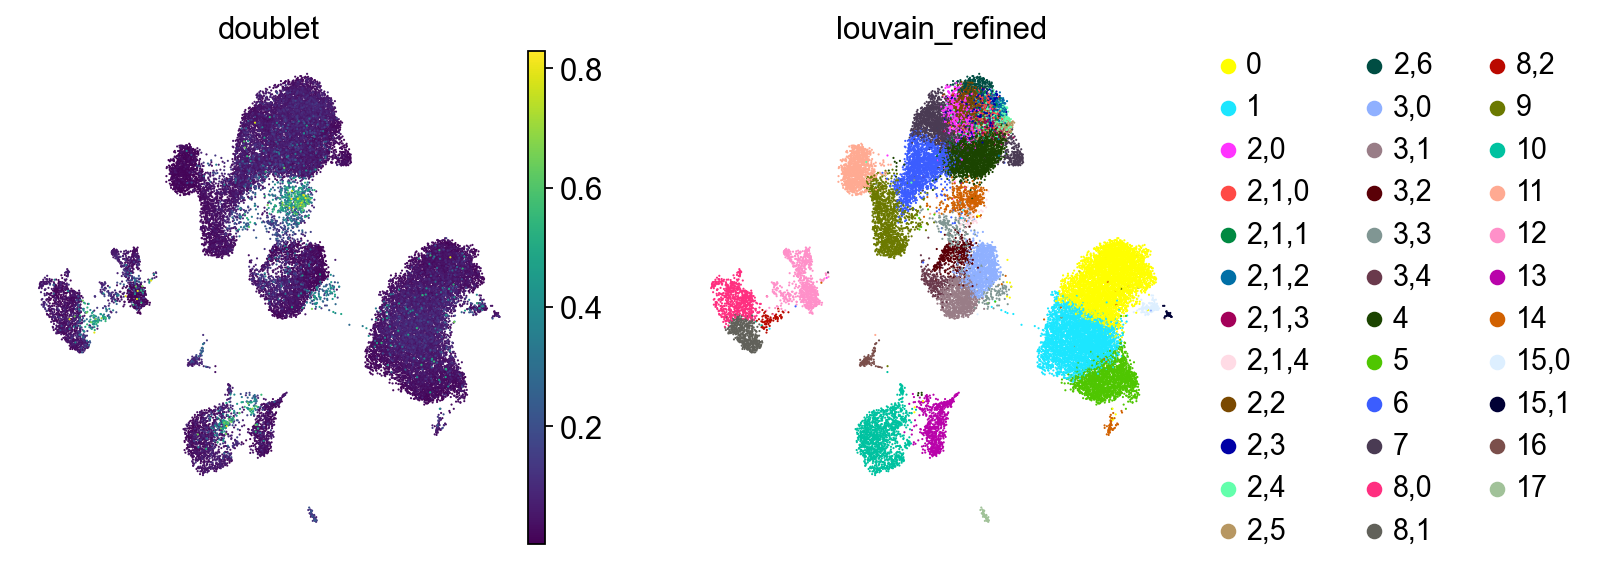

In [84]:
sc.pl.umap(adata, color=['doublet', 'louvain_refined'])

In [91]:
map_names = {}

for c in adata.obs['louvain_refined'].cat.categories:
    if c in ['2,0','2,1,0','2,1,1','2,1,2','2,1,3','2,2','2,3','2,4','2,5','2,6','4','6', '7', '9', '11']:
        map_names[c] = 'beta'
    elif c in ['0', '1', '5']:
        map_names[c] = 'alpha'  
    elif c in ['3,0', '3,1', '3,4', '3,2']:
        map_names[c] = 'delta'
    elif c in ['15,0']:
        map_names[c] = 'PP'    
    elif c in ['15,1']:
        map_names[c] = 'epsilon'
    elif c in ['14', '3,3', '14', '2,1,4']:
        map_names[c] = 'polyhormonal'
    elif c in ['8,0','8,1']:
        map_names[c] = 'ductal'
    elif c in ['12']:
        map_names[c] = 'acinar'     
    elif c in ['16']:
        map_names[c] = 'endothelial'
    elif c in ['13']:
        map_names[c] = 'stellate'
    elif c in ['10']:
        map_names[c] = 'fibroblast'
    elif c in ['17']:
        map_names[c] = 'immune'
    elif c in ['8,2']:
        map_names[c] = 'doublet' 
    else:
        map_names[c] = c

adata.obs['louvain_anno_broad'] = adata.obs['louvain_refined']
adata.obs['louvain_anno_broad'] = adata.obs['louvain_anno_broad'].map(map_names).astype('category')

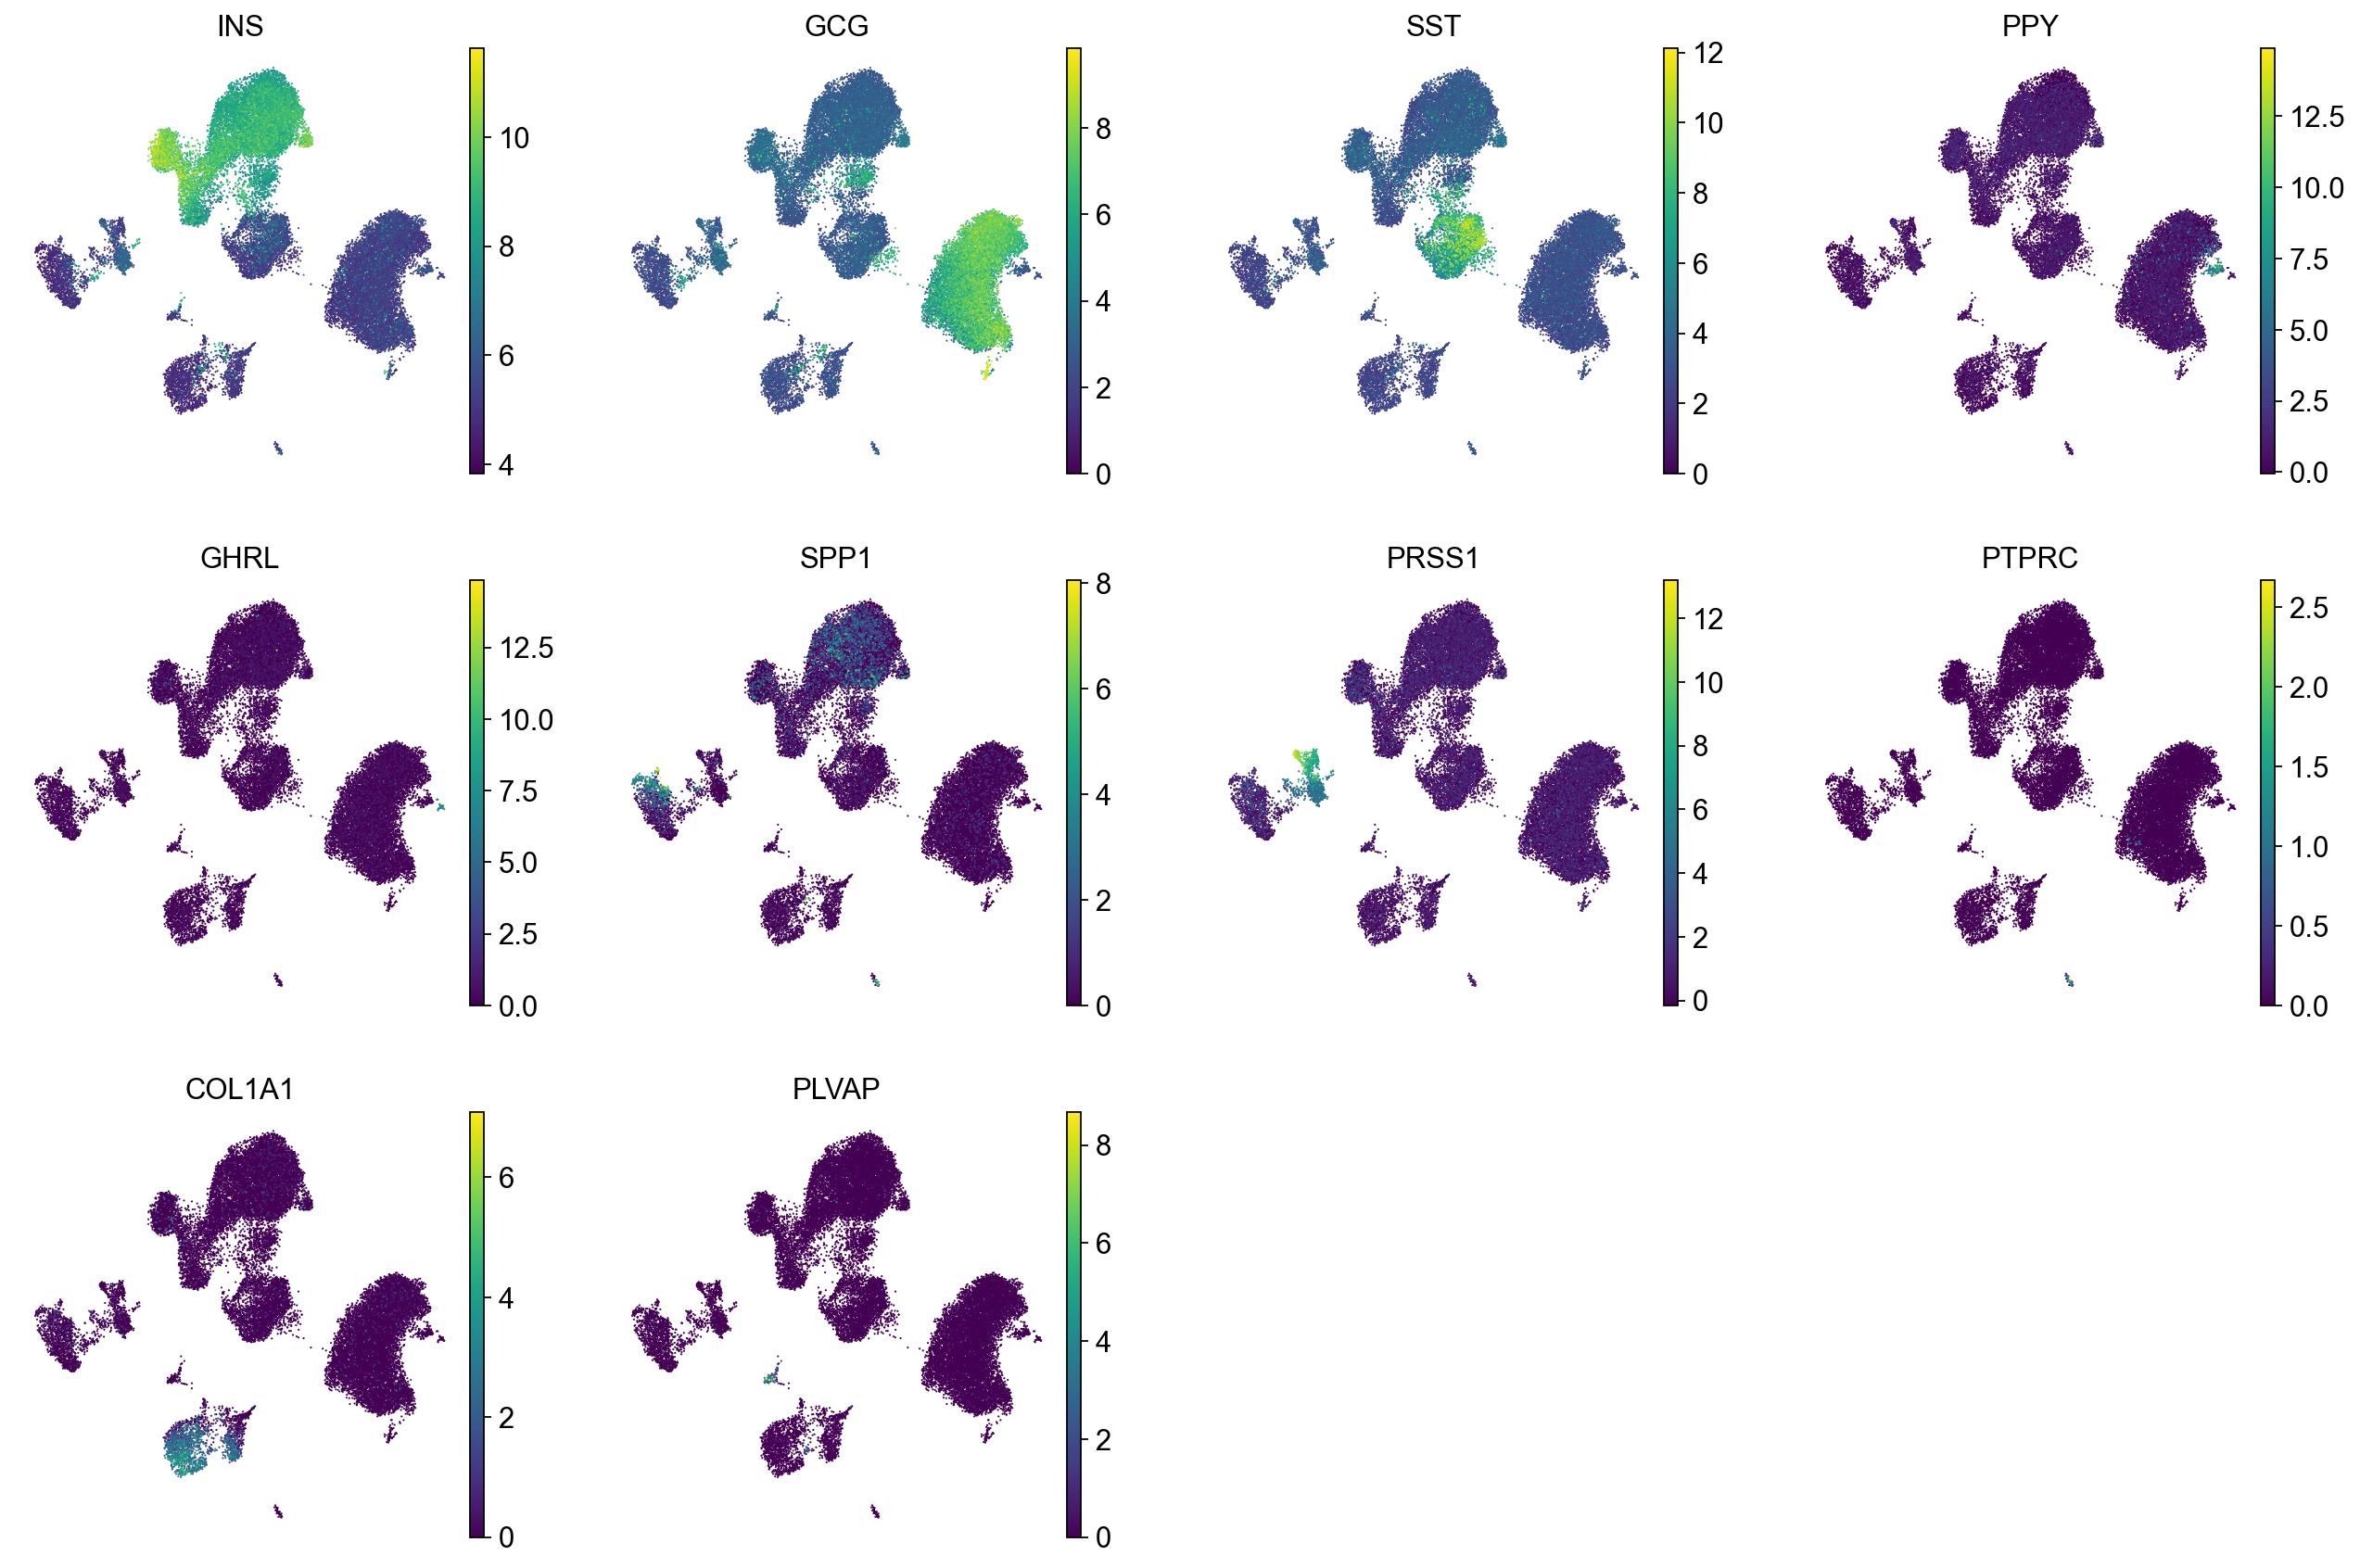

In [58]:
sc.pl.umap(adata, color=['INS', 'GCG', 'SST', 'PPY', 'GHRL', 'SPP1', 'PRSS1', 'PTPRC', 'COL1A1', 'PLVAP'])

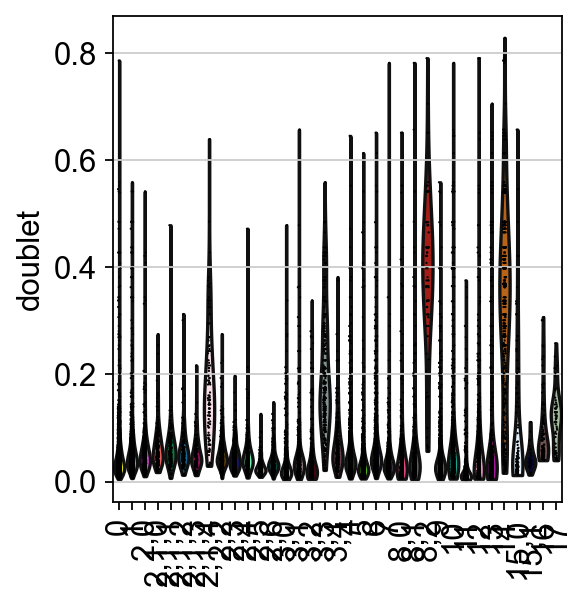

In [92]:
sc.pl.violin(adata, groupby='louvain_refined', keys='doublet', rotation=90)

In [93]:
adata.obs['louvain_anno_broad'] = adata.obs['louvain_anno_broad'].cat.reorder_categories(['alpha', 'beta', 'delta', 'PP', 'epsilon', 'polyhormonal',
                                                                                          'ductal', 'acinar', 'endothelial', 'stellate', 'fibroblast',
                                                                                          'immune', 'doublet'])

adata.uns['louvain_anno_broad_colors'] = ['#33a02c', '#e31a1c', '#1f78b4', '#b15928', '#ffbb78',
                                          '#969696', '#cab2d6', '#fccde5', '#1b4400',
                                          '#fb9a99', '#98df8a', '#a6cee3', '#d9d9d9']

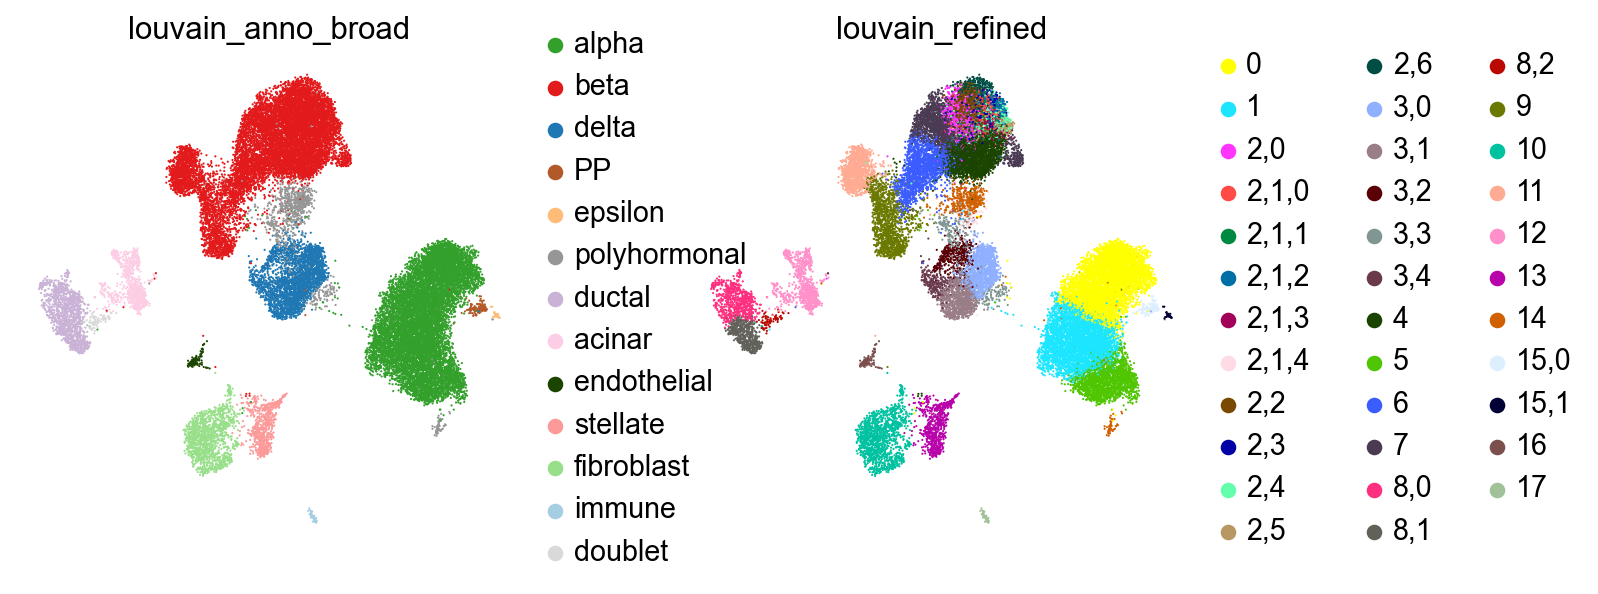

In [103]:
sc.pl.umap(adata,color=['louvain_anno_broad', 'louvain_refined'])

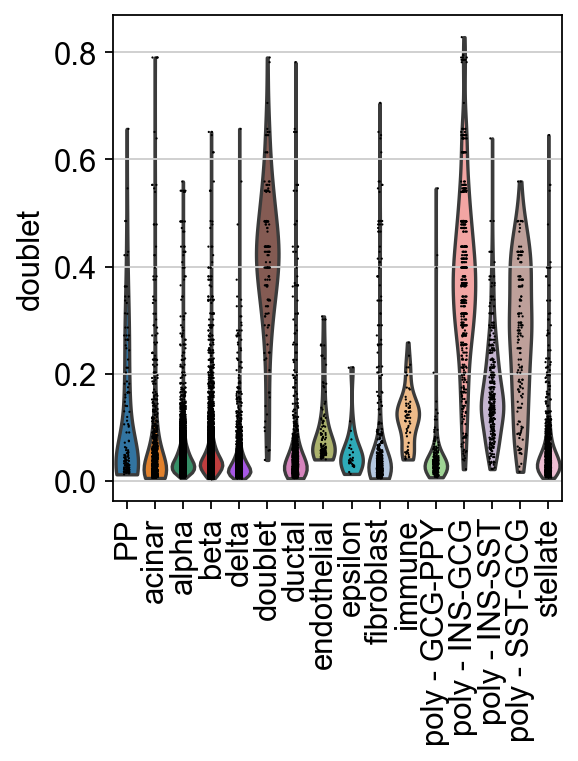

In [208]:
sc.pl.violin(adata, groupby='louvain_anno_fine', keys='doublet', rotation=90)

## Additional metadata annotations

In [95]:
map_names = {}
for c in adata.obs['donor'].cat.categories:
    if c in ['22','24','74']:
        map_names[c] = 'female'
    elif c in ['61','63']:
        map_names[c] = 'male'   
    else:
        map_names[c] = c

adata.obs['sex'] = adata.obs['donor']
adata.obs['sex'] = adata.obs['sex'].map(map_names).astype('category')
adata.uns['sex_colors'] = ['#1b9e77','#d95f02']

In [96]:
adata.uns['donor_colors'] = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3']

In [151]:
meta_df = pd.DataFrame([['R229', 'female', '22', '23.0', '5.3', '1400', '17'],
                        ['R237', 'male', '61', '19.6', '5.9', '1700', '14'],
                        ['R239', 'female', '24', '22.0', '5.5', '1200', '39'],
                        ['R245', 'male', '63', '22.3', '5.6', '1800', '3'],
                        ['R266', 'female', '74', '29.2', '6.0', '1000', '29']], columns=['id', 'sex', 'age', 'BMI', 'HbA1c', 'insulin_content', 'glucose_SI'])

In [105]:
obs_df = adata.obs.merge(meta_df, left_on='donor', right_on='age', how='outer')
obs_df.index = adata.obs_names

In [106]:
adata.obs = obs_df

In [107]:
adata.obs[['id', 'sex_x', 'age', 'BMI', 'HbA1c']].drop_duplicates()

,id,sex_x,age,BMI,HbA1c
index,,,,,
AAACCTGAGAGGACGG-22,R229,female,22,23.0,5.3
AAACCTGAGACAAAGG-24,R239,female,24,22.0,5.5
AAACCTGAGACACTAA-61,R237,male,61,19.6,5.9
AAACCTGAGCTGCGAA-63,R245,male,63,22.3,5.6
AAACCTGAGTATTGGA-74,R266,female,74,29.2,6.0


## Composition

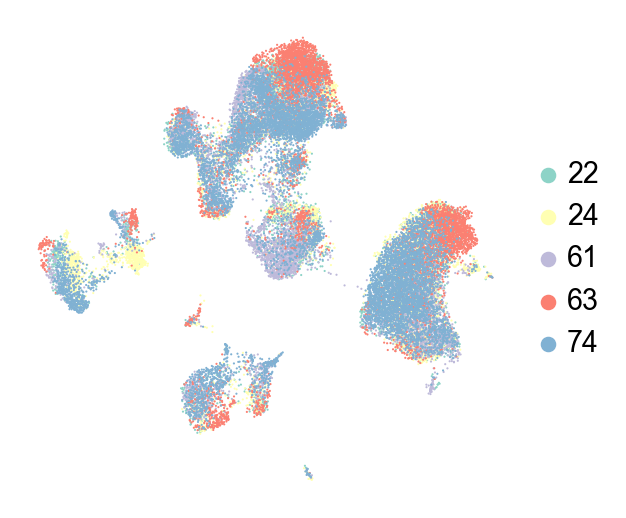

In [97]:
sc.pl.umap(adata, color='donor', title='', save='_donor')

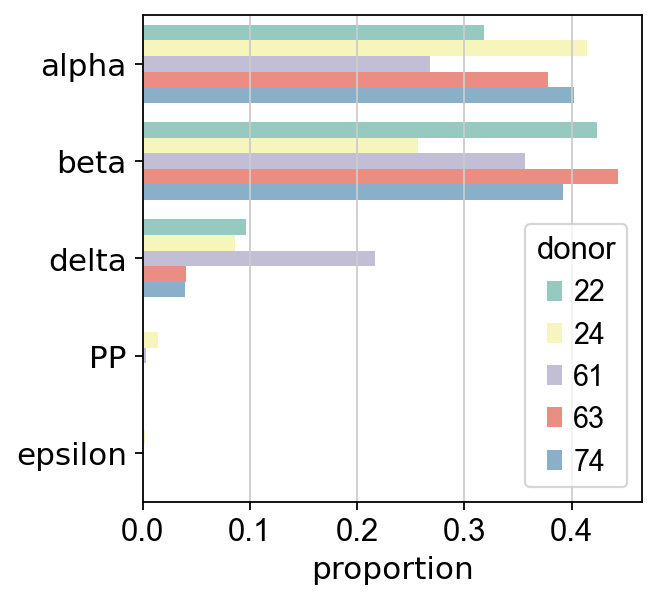

In [98]:
df = adata.obs[['louvain_anno_broad','donor']]
order_cat = ['alpha', 'beta', 'delta', 'PP', 'epsilon']
pl.subplots()
x = 'louvain_anno_broad'
hue = 'donor'
y ='proportion'
prop_df = (df[x]
            .groupby(df[hue])
            .value_counts(normalize=True)
            .rename(y)
            .reset_index())

sns.barplot(x=y, y=x, hue=hue, data=prop_df, palette=adata.uns['donor_colors'], order=order_cat, orient='h')
pl.xticks(rotation=0, fontsize=14)
pl.yticks(rotation=0, fontsize=14, fontname='Helvetica Light')
pl.ylabel('')
pl.xlabel('proportion', fontsize=14, fontname='Helvetica Light')
pl.show()

In [3]:
adata = sc.read('../../pancreatic-endocrine-cells-cross-species/human_islets/data/adata_human_all_new.h5ad')

In [6]:
adata.uns['louvain_anno_broad_colors'] = ['#33a02c', '#e31a1c', '#1f78b4', '#b15928', '#ffbb78',
                                          '#969696', '#cab2d6', '#fccde5', '#1b4400',
                                          '#fb9a99', '#98df8a', '#a6cee3', '#d9d9d9']

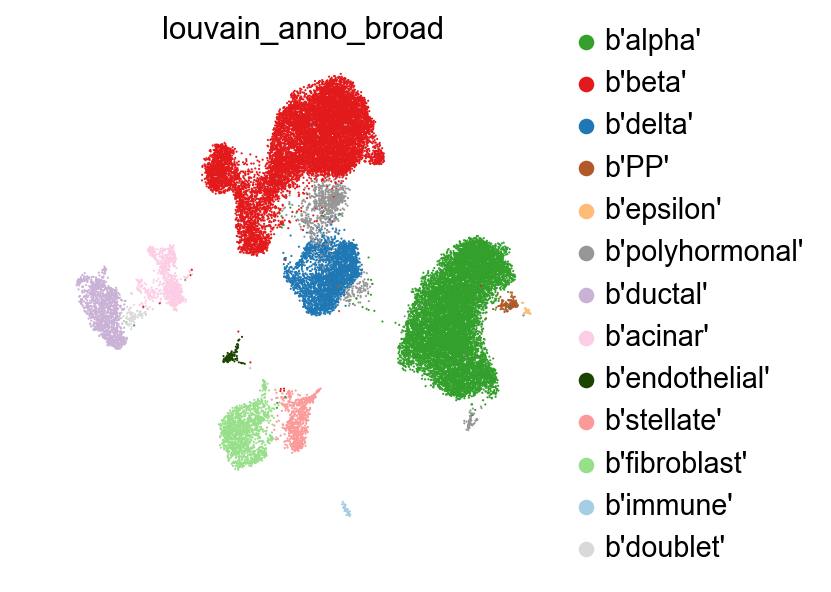

In [7]:
sc.pl.umap(adata, color='louvain_anno_broad')

In [12]:
pd.crosstab(adata.obs.donor, adata.obs.louvain_anno_broad)

louvain_anno_broad,b'alpha',b'beta',b'delta',b'PP',b'epsilon',b'polyhormonal',b'ductal',b'acinar',b'endothelial',b'stellate',b'fibroblast',b'immune',b'doublet'
donor,,,,,,,,,,,,,
b'22',1484,1975,450,4,3,139,209,110,12,119,140,9,7
b'24',2397,1485,498,82,14,141,391,412,36,142,146,22,24
b'61',1650,2196,1335,19,0,258,118,79,18,166,307,12,6
b'63',2083,2440,221,5,4,130,79,114,50,81,296,4,0
b'74',3927,3827,385,11,5,279,496,102,8,202,478,15,41


In [16]:
pd.crosstab(adata.obs.donor, adata.obs.louvain_anno_broad, normalize=0)

louvain_anno_broad,b'alpha',b'beta',b'delta',b'PP',b'epsilon',b'polyhormonal',b'ductal',b'acinar',b'endothelial',b'stellate',b'fibroblast',b'immune',b'doublet'
donor,,,,,,,,,,,,,
b'22',0.318387,0.423729,0.096546,0.000858,0.000644,0.029822,0.044840,0.023600,0.002575,0.025531,0.030036,0.001931,0.001502
b'24',0.413990,0.256477,0.086010,0.014162,0.002418,0.024352,0.067530,0.071157,0.006218,0.024525,0.025216,0.003800,0.004145
b'61',0.267683,0.356262,0.216580,0.003082,0.000000,0.041856,0.019143,0.012816,0.002920,0.026931,0.049805,0.001947,0.000973
b'63',0.378246,0.443072,0.040131,0.000908,0.000726,0.023606,0.014345,0.020701,0.009079,0.014709,0.053750,0.000726,0.000000
b'74',0.401698,0.391469,0.039382,0.001125,0.000511,0.028539,0.050736,0.010434,0.000818,0.020663,0.048895,0.001534,0.004194


## Manifold endocrine cells

In [99]:
adata_endo = adata[adata.obs.louvain_anno_broad.isin(['alpha', 'beta', 'delta', 'PP'])].copy()

In [100]:
adata_endo.uns['louvain_anno_broad_colors'] = ['#33a02c', '#e31a1c', '#1f78b4', '#b15928']

In [148]:
sc.pp.filter_genes(adata_endo, min_cells=10)

filtered out 488 genes that are detected in less than 10 cells


In [149]:
sc.pp.highly_variable_genes(adata_endo, n_top_genes=2000)
sc.pp.pca(adata_endo)
sc.pp.neighbors(adata_endo)
sc.tl.umap(adata_endo)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:11)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:23)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:09)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)


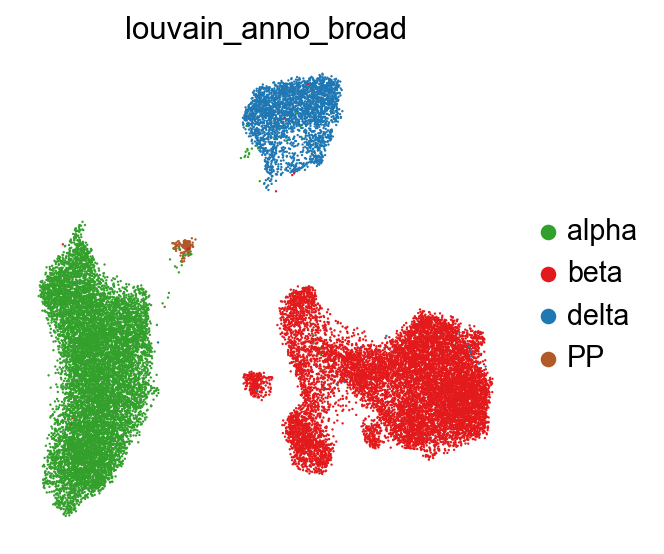

In [150]:
sc.pl.umap(adata_endo, color=['louvain_anno_broad'])

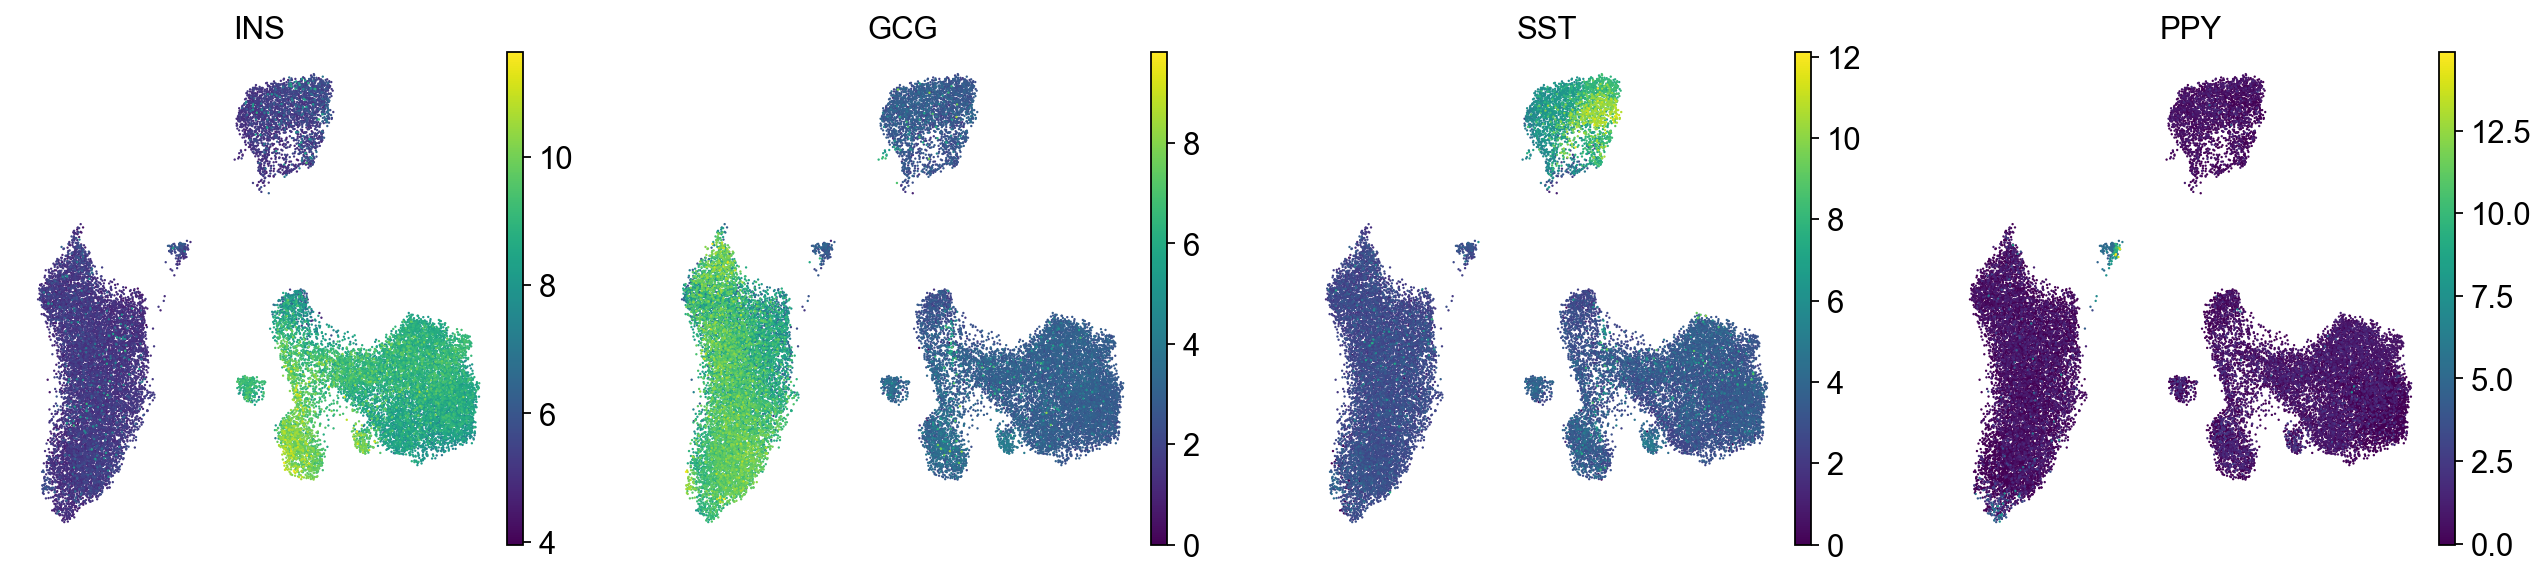

In [152]:
sc.pl.umap(adata_endo, color=['INS', 'GCG', 'SST', 'PPY'])

### save adata

In [153]:
adata_endo.write('./data/adata_human_endo.h5ad')